# Basic Plotting in Python

This notebook is a brief demo of the Matplotlib plotting package for Python. We start with some basic plots with no customizations and end with one plot with lots of different customizations. While this isn't a full walkthrough of the functionality of Matplotlib, these are most of the plotting capabilities I use on a daily basis.

Last updated on 28 May 2020 by Vanessa Meschke (vnilsen@mymail.mines.edu).

In [4]:
# Libraries we'll use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline # use this command to allow matplotlib plots to show up in Jupyter better

# Reading in data

Before we even make a plot, we need to have some data! In this demo, we'll be working with a subset of the [TEDesign Lab](https://www.sciencedirect.com/science/article/abs/pii/S0927025615007132) database, which has data on the properties of some [thermoelectric](https://en.wikipedia.org/wiki/Thermoelectric_effect) materials. 

For data read in, I prefer to use the [Pandas](https://pandas.pydata.org/) package to create [DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) (a data structure that resembles an array), which are easily converted to other data types and can be analyzed and manipulated using pre-written methods.  For example, using the [dataframe.head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) command prints the top 5 rows of the CSV, allowing us to get a feel for what kind of data is in the DataFrame. A list of methods that can be used on DataFrames can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [5]:
# Read in the data!
data_path = 'tedesignlab.csv' # This is where your data is located. 
all_data = pd.read_csv(data_path) # Turn CSV into pandas DataFrame
all_data.head() # See first 5 row of data set

,compound,Space Group,Band Gap (eV),Lattice Thermal Conductivity (W/m K),Hole mobility (cm^2 / V s),Electron mobility (cm^2 / V s),beta (p-type),beta (n-type),Number of Atoms per Unit Cell,density (g/cm^3),volume of unit cell (A^3),Bulk Modulus (GPa),Average Coordination Number
0,La1O4V1,14,3.50,9.82,1.07,0.50,0.87,0.96,24,4.82,349.6,89.8,1.92
1,La1O4V1,141,3.15,12.41,2.69,7.35,2.25,0.67,12,4.42,190.9,97.3,3.92
2,In1O3Y1,185,2.02,6.27,3.45,411.06,2.85,3.85,30,5.67,442.3,137.2,4.53
3,Ba2In2O5,46,0.93,8.07,8.50,678.87,0.99,5.69,18,6.10,318.3,89.4,3.56
4,K6Mg1O4,186,1.71,2.20,0.48,35.84,0.47,2.63,22,2.53,424.3,31.7,5.59


Now that we have some data, we can start plotting it!

# Histograms

One type of plot that can visualize the distribution of a variable is a histogram, which we can generate with the [hist()](https://matplotlib.org/3.1.0/gallery/statistics/hist.html) method in Matplotlib. In the example below, we're examining the distribution of the [lattice thermal conductivity](https://en.wikipedia.org/wiki/Thermal_conductivity) ($\kappa$). We can see that most of the values of $\kappa$ in this dataset are are less than 50 W/m K.

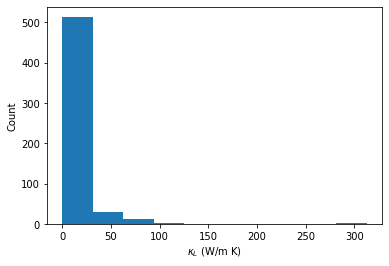

<Figure size 432x288 with 0 Axes>

In [6]:
# Bar plots & histograms
kappa = all_data['Lattice Thermal Conductivity (W/m K)'].values # Get thermal cond & convert to NumPy array 

# Make histogram
plt.hist(kappa, bins=10) # Generate the plot with 10 bins. What number of bins is optimal?
plt.ylabel("Count") # Label the axes
plt.xlabel('$\kappa_{L}$ (W/m K)')
plt.show() # show the plot in Jupyter
plt.savefig('./kappa_hist.png') # Save plot as png

And below is an example of a cumulative histogram. The height of the bars to the left are added to the height of the bars to the right. These plots aren't as common as typical histograms, but they can be used to quickly estimate percentiles. 

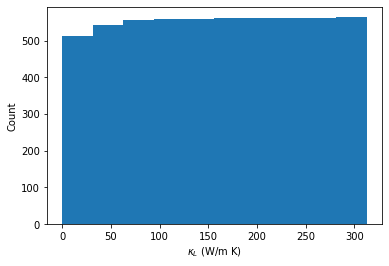

<Figure size 432x288 with 0 Axes>

In [7]:
# Cumulative histogram
plt.hist(kappa, bins=10, cumulative=True) # Generate the plot
plt.ylabel("Count") # Label the axes
plt.xlabel('$\kappa_{L}$ (W/m K)')
plt.show() # show the plot in Jupyter
plt.savefig('./kappa_chist.png') # Save plot as png

# Bar plot

Another plot that can be useful to communicate a trend to your audience is a bar plot. In this example, we'll make a bar plot that displays the counts of different [space groups](https://en.wikipedia.org/wiki/Space_group) that appear in our data set using matplotlib's [bar()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.bar.html) method.

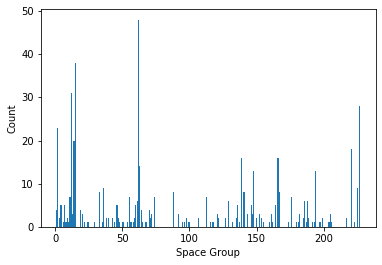

<Figure size 432x288 with 0 Axes>

In [30]:
# Bar plot
# Read in values to plot and convert to a list
sg = all_data['Space Group'].values.tolist()

# Get counts of each space group
unique_sg = {} # make a dictionary to keep track of space group counts. Key is space group, value is count
for s in sg: # for every item in the list
    if s in unique_sg.keys(): # check if that item already has already been added to unique list
        unique_sg[s] = unique_sg[s] + 1 # if it has already been added, increment count
    else:
        unique_sg[s] = 1 # if it hasn't been added, create a new spot to hold count for this space group
        
#print(unique_sg) # Print the dictionary to check it out!

# Make bar plot 
sg = unique_sg.keys() # Get the list of unique space groups from the dictionary
counts = unique_sg.values() # Get the counts corresponding to each unique space group
plt.bar(sg, counts) # generate plots
plt.xlabel('Space Group') # label the axes
plt.ylabel('Count')
plt.show() # show the plot
plt.savefig('./sg_bar.png') # save the plot as a .png

# Scatter Plots

Scatter plots are a great way to look for correlations in data. Below is an example of scatter plotting the volume of a [unit cell](https://chemed.chem.purdue.edu/genchem/topicreview/bp/ch13/unitcell.php) as a function of the number of atoms in the unit cell. In this plot, we can see a correlation: more atoms in a unit cell roughly translates to larger unit cell volume. While this isn't a rule about materials, we can see this trend appear in this data set.

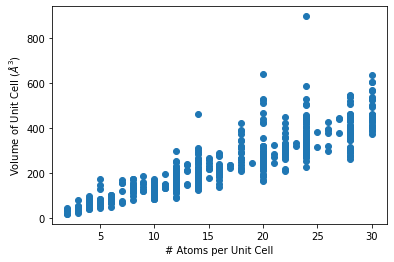

<Figure size 432x288 with 0 Axes>

In [21]:
# Single scatter plot
# Read in the values to scatter plot
atoms_uc = all_data['Number of Atoms per Unit Cell']
vol_uc = all_data['volume of unit cell (A^3)']

# Make scatter plot
plt.scatter(atoms_uc, vol_uc) # Scatter data
plt.xlabel('# Atoms per Unit Cell') # Set axis labels
plt.ylabel('Volume of Unit Cell ($\AA^3$)')
plt.show() # Show plot
plt.savefig('./atoms_vol_scatter.png') # Save plot as .png

# Making it spicy!

Matplotlib does have a ton of opportunity to customize your plots. Here are some of the most common changes you can make to customize your plots. We'll be running this example by scatter plotting [bulk modulus](https://en.wikipedia.org/wiki/Bulk_modulus) and [density](https://en.wikipedia.org/wiki/Density) as a function of [band gap](https://en.wikipedia.org/wiki/Band_gap).

Note: More customization does not always make a better plot! Remember, you want to more easily convey information with your plot, not confuse your audience. **THE PLOT BELOW WITHOUT CHANGES IS NOT A GOOD EXAMPLE OF A PUBLICATION-WORTHY PLOT**. 

### Playing with color
[Available colors in Matplotlib](https://matplotlib.org/3.2.1/tutorials/colors/colors.html)

### Playing with marker style
[Available markers in Matplotlib](https://matplotlib.org/3.2.1/api/markers_api.html)

### Playing with font & font size
[Matplotlib text documentation](https://matplotlib.org/3.1.1/tutorials/text/text_intro.html)
[Font demo from matplotlib](https://matplotlib.org/3.2.1/gallery/text_labels_and_annotations/fonts_demo.html)

### Playing with annotations
[Available properties to change for the legend](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.legend.html)
[Available properties for plot annotations](https://matplotlib.org/3.2.1/tutorials/text/annotations.html)

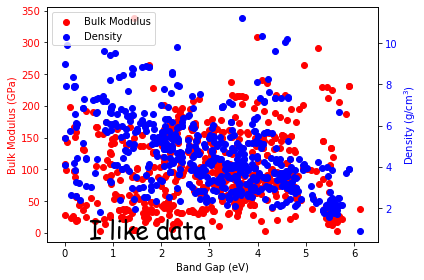

<Figure size 432x288 with 0 Axes>

In [20]:
# Making it spicy (legends, colors, etc.)

# Multi-scatter w/ legend
# Read in the values to scatter plot
bandgap = all_data['Band Gap (eV)']
density = all_data['density (g/cm^3)']
bm = all_data['Bulk Modulus (GPa)']

# Make figure and sub-axes
fig, ax1 = plt.subplots()

# Scatter plot bulk modulus vs band gap
bm_color = 'red' # set color
ax1.set_xlabel('Band Gap (eV)') # set axis labels
ax1.set_ylabel('Bulk Modulus (GPa)', color=bm_color)
s1 = ax1.scatter(bandgap, bm, color=bm_color, label='Bulk Modulus', alpha=1, marker='o') # scatter and save data
ax1.tick_params(axis='y', labelcolor=bm_color) # update the ticks to match the scatter plot color

# Duplicate x axis and make new axis to plot density vs band gap
ax2 = ax1.twinx() # duplicate axis
color = 'blue' # set color
ax2.set_ylabel('Density (g/cm$^3$)', color=color)  # Set axis label (note: x was set above)
s2 = ax2.scatter(bandgap, density, color=color, label='Density', alpha=1, marker='o') # scatter and save data
ax2.tick_params(axis='y', labelcolor=color) # update the ticks to match the scatter plot color

# Adding annotation with a different font
csfont = {'fontname':'Comic Sans MS'} # Make the Comic Sans font
plt.annotate('I like data', (.5,.5),**csfont, fontsize = 24) # Annotate on plot - 'string', (x,y) coord, **font

plt.legend([s1, s2], ['Bulk Modulus', 'Density']) # Add a legend
plt.tight_layout() # Trim whitespace from outside of plot and compress dimensions
plt.show() # show the plot
plt.savefig('./fancy_scatter.png') # save plot as .png

All in all, plotting is an excellent way to convey technical information concisely in a way that tells a story. Picking axes, setting scales, and color selection are all part of the art of making a great plot!